In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from glob import glob
import numpy as np
import cv2

#### Image CLASS-ID SPECIES BREED ID
#### ID: 1:37 Class ids
#### SPECIES: **1**:Cat &nbsp; **2**:Dog
#### BREED ID: 1-25:Dog 1-12:Cat

In [3]:
df = pd.read_csv('1_data/annotations/list.txt',skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [4]:
print(df['species'].value_counts().sort_index()) # 1:Cat 2:Dog

1    2371
2    4978
Name: species, dtype: int64


([<matplotlib.axis.XTick at 0x292332b50>,
 [Text(0, 0, '1'), Text(1, 0, '2')])

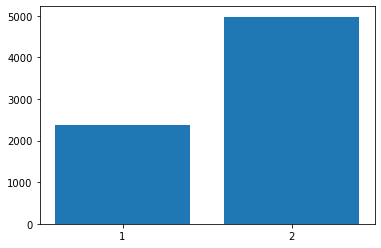

In [6]:
# 1 : Cat, 2: : Dog
value_counts = df['species'].value_counts().sort_index() # 1:Cat 2:Dog
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

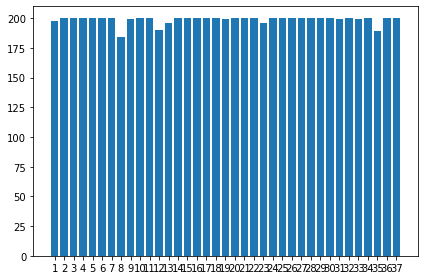

In [22]:
# 고양이와 강아지가 총 37가지의 종이 있어 각 클래스 별로 시각화

value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values) #(눈금 적용할 x축의 실제 위치 , 그 위치에 넣어줄 각 라벨 ) 따라서 두개의 인자는 갯수가 동일해야함

plt.tight_layout()

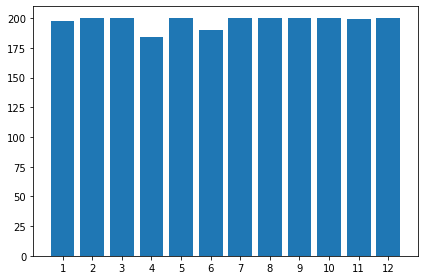

In [23]:
# 고양이 종에 따른 막대 그래프
value_counts = df[df['species'] ==  1]['breed'].value_counts().sort_index() # 1 : cat

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()

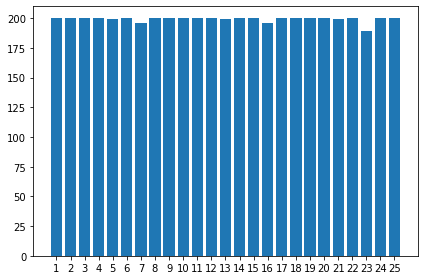

In [24]:
# 강아지 종에 따른 막대 그래프
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index() # 2 : dog

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()

In [25]:
image_dir = './1_data/images/' # image directory
bbox_dir = './1_data/annotations/xmls/' # bbox directory
seg_dir = './1_data/annotations/trimaps/' # segmation directory

### Image Files

In [26]:
image_files = glob(image_dir+'*jpg')
len(image_files)

7390

In [27]:
image_files[:5]

['./1_data/images/Egyptian_Mau_167.jpg',
 './1_data/images/pug_52.jpg',
 './1_data/images/basset_hound_112.jpg',
 './1_data/images/Siamese_193.jpg',
 './1_data/images/shiba_inu_122.jpg']

### Segmentation Files

In [28]:
seg_files = glob(seg_dir+'*.png')
len(seg_files)

7390

In [29]:
seg_files[:5]

['./1_data/annotations/trimaps/american_pit_bull_terrier_172.png',
 './1_data/annotations/trimaps/boxer_190.png',
 './1_data/annotations/trimaps/Sphynx_8.png',
 './1_data/annotations/trimaps/keeshond_37.png',
 './1_data/annotations/trimaps/Siamese_5.png']

### Bounding Box Files

In [30]:
bbox_files = glob(bbox_dir+'*.xml')
len(bbox_files)

3686

In [31]:
bbox_files[:5]

['./1_data/annotations/xmls/British_Shorthair_10.xml',
 './1_data/annotations/xmls/german_shorthaired_119.xml',
 './1_data/annotations/xmls/english_setter_158.xml',
 './1_data/annotations/xmls/Siamese_178.xml',
 './1_data/annotations/xmls/pomeranian_162.xml']

In [32]:
images_path = image_files[3]
print(images_path)
bbox_path = images_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')  #images_path에 image_dir문자열을 찾아 bbox_dir로 바꿔준다.
# image_dir './1_data/images/'
# bbox_dir './1_data/annotations/xmls/'
print(bbox_path)

./1_data/images/Siamese_193.jpg
./1_data/annotations/xmls/Siamese_193.xml


In [33]:
image = cv2.imread(images_path)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(500, 333, 3)

In [34]:
import xml.etree.ElementTree as et

In [36]:
tree = et.parse(bbox_path)
tree

In [38]:
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)
print(xmin, xmax, ymin, ymax)

125.0 282.0 68.0 236.0


In [39]:
from matplotlib.patches import Rectangle

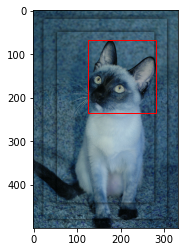

In [42]:
rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

# Rectangle(이미지, width, height, fill, color) # fill 안에 색을 칠할지 말지
# Rectangle((시작점 좌표), (종료점 좌표),fill, color) # fill 안에 색을 칠할지 말지
# Rectangle((시작점 좌표), width, height, fill, color) # fill 안에 색을 칠할지 말지

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

In [53]:
images_path = image_files[30]
print(image_path)
#./1_data/annotations/trimaps/
seg_path = images_path.replace(image_dir, seg_dir).replace('jpg', 'png')  #images_path에 image_dir문자열을 찾아 bbox_dir로 바꿔준다.
print(seg_path)

image = cv2.imread(images_path, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)
print(image.shape)
print(seg_map.shape)

./1_data/images/german_shorthaired_131.jpg
./1_data/annotations/trimaps/german_shorthaired_131.png
(375, 500, 3)
(375, 500)


<function matplotlib.pyplot.show(close=None, block=None)>

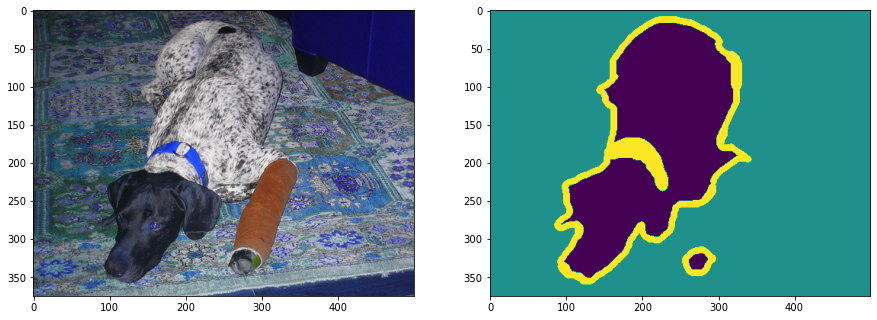

In [54]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)
plt.show

### 교차검증
- 데이터의 수가 적은 경우 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어짐
- 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않음
- 데이터 수가 적은 경우 해결하기 위한 검증 방법
- 과적합을 해결하기 위한 방법

In [55]:
from sklearn.model_selection import KFold

In [56]:
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=40)

df['fold'] = -1
for idx, (t, v) in enumerate(kf.split(df), 1) : # 마지막 저 1은 인덱스 값이 1부터 시작 t: train data v : validation data
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx
    

[   2    3    4 ... 7346 7347 7348] [   0    1    5 ... 7326 7327 7333] 1470
[   0    1    2 ... 7344 7345 7347] [   3   15   17 ... 7338 7346 7348] 1470
[   0    1    3 ... 7346 7347 7348] [   2    4   12 ... 7330 7334 7337] 1470
[   0    1    2 ... 7346 7347 7348] [   7    8   14 ... 7341 7343 7344] 1470
[   0    1    2 ... 7344 7346 7348] [   9   11   21 ... 7342 7345 7347] 1469


In [58]:
df

,file_name,id,species,breed,fold
0,Abyssinian_100,1,1,1,1
1,Abyssinian_101,1,1,1,1
2,Abyssinian_102,1,1,1,3
3,Abyssinian_103,1,1,1,2
4,Abyssinian_104,1,1,1,3
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,4
7345,yorkshire_terrier_97,37,2,25,5
7346,yorkshire_terrier_98,37,2,25,2
7347,yorkshire_terrier_99,37,2,25,5


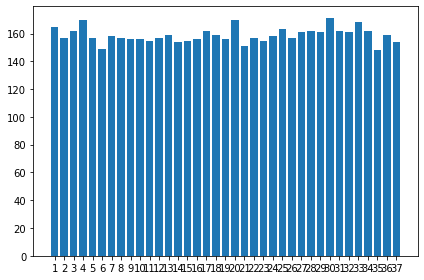

In [61]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

In [63]:
from sklearn.model_selection import StratifiedKFold

In [66]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1) : # 어떤 특성을 기준으로 데이터분포를 균이할게 할것인지를 써줘야함
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    2    4 ... 7345 7346 7348] [   1    3   13 ... 7337 7342 7347] 1470
[   0    1    2 ... 7346 7347 7348] [   6   25   31 ... 7333 7340 7344] 1470
[   1    3    4 ... 7344 7345 7347] [   0    2    8 ... 7343 7346 7348] 1470
[   0    1    2 ... 7346 7347 7348] [   7   10   11 ... 7336 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [   4    5    9 ... 7321 7328 7338] 1469


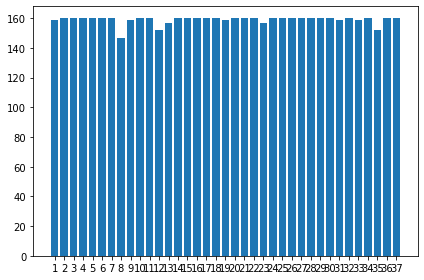

In [67]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

In [68]:
df.to_csv('1_data/kfolds.csv', index=False)